In [1]:
from netCDF4 import Dataset

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import LightSource
from matplotlib.cm import get_cmap
from matplotlib.patches import Rectangle, Polygon
from matplotlib.colors import LogNorm
#import matplotlib.colors as colors

#from scipy.interpolate import interp1d

from mpl_toolkits.basemap import Basemap

import numpy as np

import cartopy.crs as crs
import cartopy._crs as _ccrs
from cartopy.feature import NaturalEarthFeature

import wrf
from wrf import (to_np, getvar, smooth2d, get_cartopy,get_basemap, cartopy_xlim,
                 cartopy_ylim, latlon_coords)

import warnings


warnings.filterwarnings("ignore")

/home/agustin/anaconda3/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/home/agustin/anaconda3/lib/python3.7/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


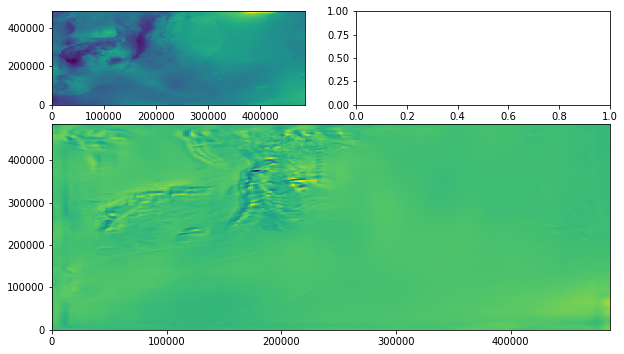

In [14]:

a = !ls /media/agustin/Linux/salidas_wrf/compl-ndg/wrfout*

ff = !ls /media/agustin/1D36257C5C6244CB/WRF_sim/wrfout*

ff = list(ff)

a = list(a)



class collage():   
    def __init__(_,archivo):
        
        super().__init__()
        
        _.archivo = archivo
        _.set_vars = False
        

    def carga_datos(_):
    #Carga los datos del netcdf
        _.data = Dataset(_.archivo,'r')
        _.lat = getvar(_.data,'XLAT')
        _.lon = getvar(_.data,'XLONG')
        _.Times = _.data.variables['Times']
        _.bm = get_basemap(_.lon)   
            
        
        return 
                
        
    def mapa(_,num_axis = 4,grid_spec = [((0,1),(0,1)),((0,1),(1,2)),((1,3),(0,2)),((3,4),(0,1))],
            figsize = (10,10)):
    # Genera el mapa entero
        
        _.maps = []
                
        _.fig = plt.figure(figsize=figsize)
        _.gs = _.fig.add_gridspec(5, 2)
        
        _.ax = []
        for i,gs_lim in zip(range(num_axis),grid_spec):
            
            _.ax.append(collage.gen_ax(_,gs_lim[0],gs_lim[1],num_grid=i))  
        
        return 

    def carga_vars(_,  grid_s = ['','','','',''], time_s=[1,2,3,4,5], lev_s = [0,0,0,0,0]
                 ,grid_c =['','','','',''],time_c=[1,2,3,4,5], lev_c = [0,0,0,0,0]):
        
        
        collage.carga_datos(_)
        _.var_s_grid = grid_s
        
        for i,var_s in enumerate(grid_s):

            if var_s == '': continue
            else: _.var_s_grid[i] =  _.data.variables[var_s][time_s[i],lev_s[i],...]     
        
        
        _.x,_.y = _.bm(to_np(_.lon),to_np(_.lat))
        
        _.set_vars = True
        
        return

    
    def gen_ax(_,gs_limx,gs_limy, num_grid):
    #Genera los ax y lo manda a plotear
        ax = _.fig.add_subplot(_.gs[gs_limx[0]:gs_limx[1],gs_limy[0]:gs_limy[1]])
        
        collage.plot_ax(_,num_grid=num_grid ,ax=ax)
        
        
        return ax
        
    def plot_contour(_,ax,var_c):
    
        return 0    
        
    def plot_somb(_,ax,var_s):
        
        _.maps.append(ax.pcolormesh(_.x,_.y,var_s))
        
        return

    def plot_viento():
            
        return

    def plot_ax(_,ax,num_grid):
    # Genera los plot de los ax
        
        if _.set_vars == True:
            if type(_.var_s_grid[num_grid]) == str: return
            collage.plot_somb(_,ax,_.var_s_grid[num_grid])

        return 
    

a = collage(a[0])

a.carga_vars(grid_s=['QVAPOR','','W'], time_s=[1,1,1], lev_s=[0,0,13])

a.mapa(num_axis=3)



In [13]:
a.show()

In [35]:
a = [1,1,2,3,4]

a[0:1]

[1]